In [18]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('/Users/taniadawood/Desktop/DSCI550-PixstoryMediaExtractionAndAnalysis/1_Language Identification/Master_Dataset_Raw_LangDetect_Complete.csv')


In [5]:
df.head(5)

,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,Date (No Timestamp),Interest,Narrative LangDetect,Narrative TikaDetect
0,121169,STY1659426957,103,USR1606807023,female,34,Trend of the Year: Barbiecore,"The colour of the year is here, and it's *drum...",https://image.pixstory.com/Pixstory-image-1659...,2020-01-12 12:47:00,2020-01-12,"trends, fashion, barbie",[en:0.9999974986518982],en
1,127727,STY1660634861,103,USR1606807023,female,34,Abomination of the day,We Indians do love to bastardise our foods- Ch...,https://image.pixstory.com/Pixstory-image-1660...,2020-01-12 12:47:00,2020-01-12,"Food, momos, weird menus",[en:0.9999957708537239],en
2,123665,STY1660027898,103,USR1606807023,female,34,Shameful headline in 2022,Can professors not have personal lives? \n\nAd...,https://image.pixstory.com/Pixstory-image-1660...,2020-01-12 12:47:00,2020-01-12,"misogyny, st xaviers",[en:0.999996152302975],en
3,130517,STY1661151635,103,USR1606807023,female,34,Woman lawyer arrested for abusing security guard,"She was recorded on video manhandling him, sho...",https://image.pixstory.com/Pixstory-image-1661...,2020-01-12 12:47:00,2020-01-12,"Technology, History, Food, Entertainment, Spor...",[en:0.9999974174347146],en
4,125466,STY1660372361,109,USR1606851217,others,31,What is the Inflation Reduction Act?,The House passed the Inflation Reduction Act o...,https://image.pixstory.com/Pixstory-image-1660...,2020-02-12 01:03:00,2020-02-12,us government,[en:0.9999966874383718],en


What is the most prevalent language in the posts, and least prevalent? (Tania)

In [40]:
tika_lang_count = Counter(df['Narrative TikaDetect'])

print(tika_lang_count)


Counter({'en': 67056, 'it': 11575, 'bn': 2691, 'af': 1256, nan: 1247, 'ro': 940, 'id': 757, 'cy': 640, 'ms': 626, 'tl': 609, 'de': 601, 'fr': 585, 'hi': 577, 'ml': 487, 'ca': 459, 'no': 437, 'so': 434, 'nl': 353, 'eu': 338, 'ht': 318, 'br': 253, 'ga': 252, 'da': 225, 'sv': 200, 'sl': 197, 'et': 181, 'sw': 179, 'sq': 171, 'tr': 163, 'mt': 146, 'pl': 139, 'oc': 107, 'fi': 105, 'pt': 100, 'es': 75, 'cs': 69, 'sk': 65, 'ast': 55, 'hr': 46, 'is': 44, 'an': 43, 'lt': 41, 'gl': 34, 'vi': 30, 'fa': 20, 'hu': 19, 'lv': 19, 'mr': 10, 'ne': 9, 'ru': 9, 'ta': 3, 'zh-CN': 2, 'pa': 1, 'uk': 1, 'te': 1})


In [39]:
print(tika_lang_count)

Counter({'en': 67056, 'it': 11575, 'bn': 2691, 'af': 1256, nan: 1247, 'ro': 940, 'id': 757, 'cy': 640, 'ms': 626, 'tl': 609, 'de': 601, 'fr': 585, 'hi': 577, 'ml': 487, 'ca': 459, 'no': 437, 'so': 434, 'nl': 353, 'eu': 338, 'ht': 318, 'br': 253, 'ga': 252, 'da': 225, 'sv': 200, 'sl': 197, 'et': 181, 'sw': 179, 'sq': 171, 'tr': 163, 'mt': 146, 'pl': 139, 'oc': 107, 'fi': 105, 'pt': 100, 'es': 75, 'cs': 69, 'sk': 65, 'ast': 55, 'hr': 46, 'is': 44, 'an': 43, 'lt': 41, 'gl': 34, 'vi': 30, 'fa': 20, 'hu': 19, 'lv': 19, 'mr': 10, 'ne': 9, 'ru': 9, 'ta': 3, 'zh-CN': 2, 'pa': 1, 'uk': 1, 'te': 1})


Text(0.5, 1.0, 'Histogram of Detected Languages')

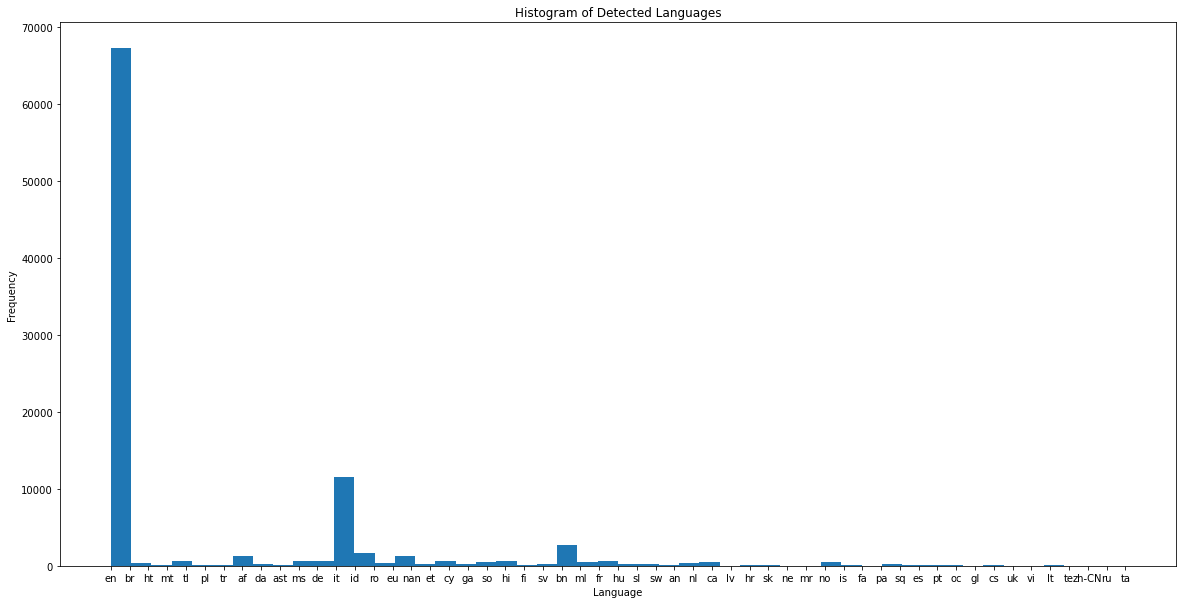

In [51]:
# convert counter to dictionary, with string values
tika_lang_dict = {str(k): v for k, v in tika_lang_count.items()}

# plot histogram
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(tika_lang_count.keys(), weights=tika_lang_count.values(), bins=50)
ax.set_xlabel('Language')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Detected Languages')

In [41]:
df['language_code'] = df['Narrative LangDetect'].str.extract(r'\[([a-z]{2})')

google_lang_count = Counter(df['language_code'])

print(google_lang_count)

Counter({'en': 67663, 'it': 9241, 'bn': 2693, 'ca': 2485, 'af': 1619, 'id': 1559, 'ro': 1245, nan: 1182, 'fr': 681, 'tl': 646, 'de': 618, 'hi': 578, 'no': 531, 'ml': 486, 'cy': 436, 'so': 385, 'nl': 350, 'sw': 266, 'sl': 263, 'da': 220, 'sq': 214, 'et': 207, 'sv': 204, 'fi': 194, 'tr': 173, 'pt': 141, 'pl': 128, 'es': 105, 'hr': 78, 'vi': 78, 'sk': 71, 'lt': 67, 'cs': 60, 'lv': 52, 'fa': 21, 'hu': 19, 'ne': 11, 'mr': 10, 'ru': 9, 'ja': 4, 'ta': 3, 'zh': 2, 'pa': 1, 'te': 1})


Text(0.5, 1.0, 'Histogram of Detected Languages')

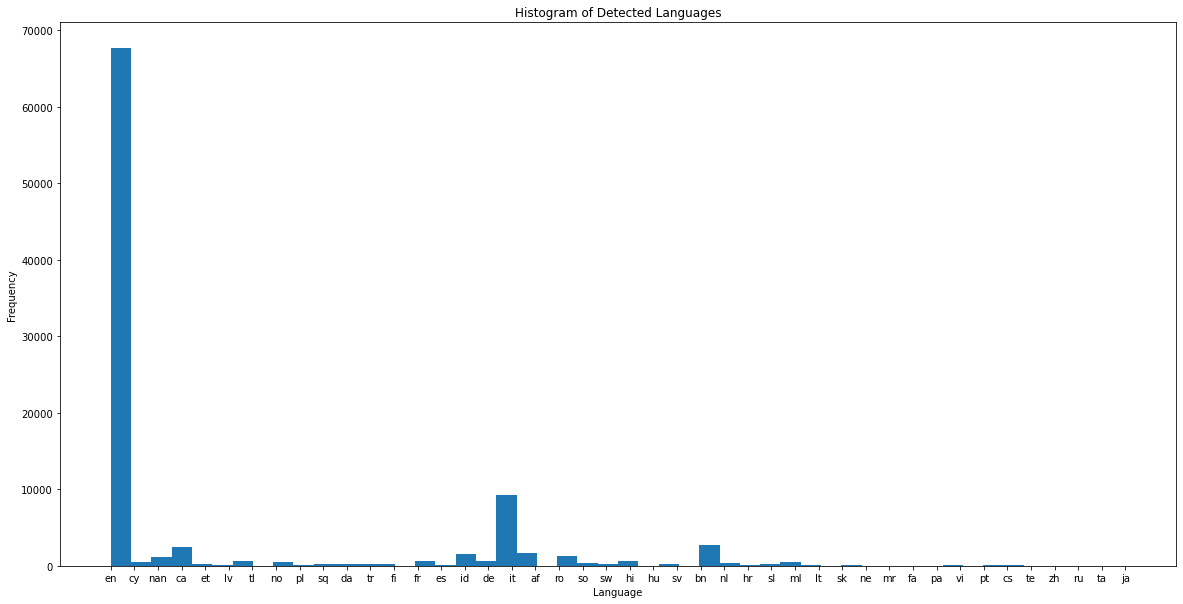

In [57]:
# convert counter to dictionary, with string values
google_lang_dict = {str(k): v for k, v in google_lang_count.items()}

# plot histogram
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(google_lang_count.keys(), weights=google_lang_count.values(), bins=50)
ax.set_xlabel('Language')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Detected Languages')

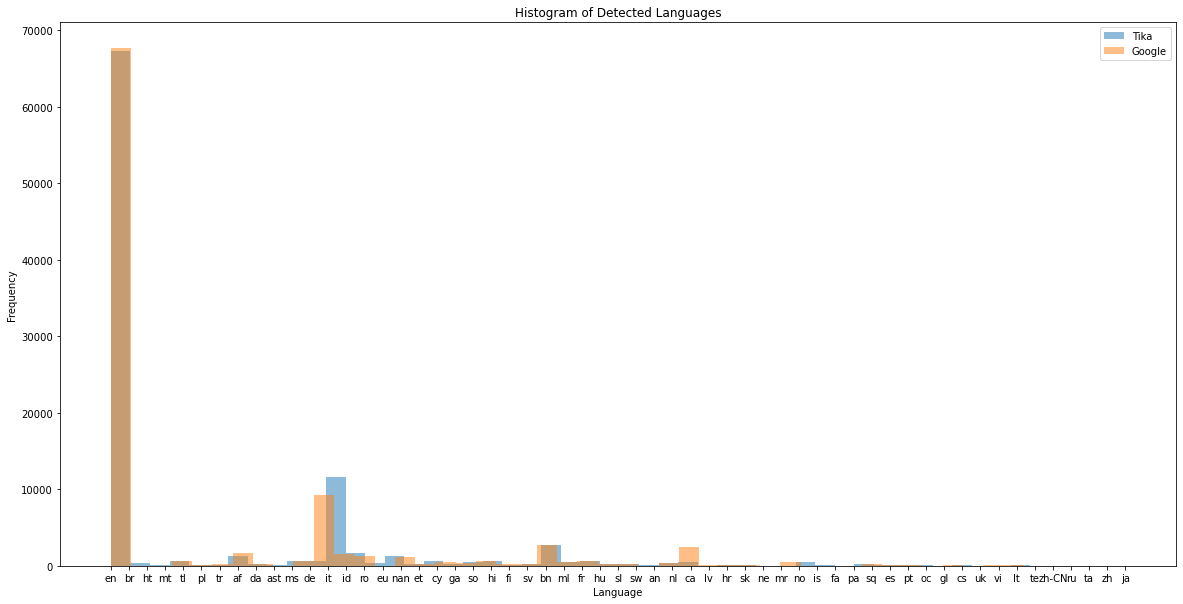

In [58]:
# convert counters to dictionaries, with string values
tika_lang_dict = {str(k): v for k, v in tika_lang_count.items()}
google_lang_dict = {str(k): v for k, v in google_lang_count.items()}

# plot histograms
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(tika_lang_count.keys(), weights=tika_lang_count.values(), bins=50, alpha=0.5, label='Tika')
ax.hist(google_lang_count.keys(), weights=google_lang_count.values(), bins=50, alpha=0.5, label='Google')
ax.set_xlabel('Language')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Detected Languages')
ax.legend(loc='upper right')
plt.show()
